In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("dataset/train.csv")

In [3]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [5]:
# df.describe()

In [6]:
df['last_date_of_month_7'][296]

nan

In [7]:
#Problem 1 too many columns how to do preprocessing on them?

In [8]:
#Is there any duplicate row?
df.duplicated().sum()

np.int64(0)

In [9]:
#remove those columns which are having more than 70% null value 
threshold = 0.7
null_percentage = df.isnull().mean()
df = df.loc[:, null_percentage <= threshold]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 142 entries, id to churn_probability
dtypes: float64(108), int64(28), object(6)
memory usage: 75.8+ MB


In [11]:
#remove those features where column has same value

# Identify columns with the same value
columns_with_constant_value = df.columns[df.nunique() == 1]

# Drop these columns
df = df.drop(columns=columns_with_constant_value)

In [12]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 129 entries, id to churn_probability
dtypes: float64(99), int64(27), object(3)
memory usage: 68.9+ MB


In [14]:
#how many features has null value?
null_features_count = df.isnull().any().sum()
print(f"Number of features with null values: {null_features_count}")

Number of features with null values: 84


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 129 entries, id to churn_probability
dtypes: float64(99), int64(27), object(3)
memory usage: 68.9+ MB


In [16]:
#calculate how many features have null values percentage wise 
import pandas as pd

# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter features with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort the missing percentages for better readability
missing_percentage = missing_percentage.sort_values(ascending=False)

# Convert to DataFrame for better display
missing_data_table = pd.DataFrame({
    'Feature': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

# Display the data
print(missing_data_table)


                Feature  Missing Percentage
0           onnet_mou_8            5.290076
1         roam_og_mou_8            5.290076
2         roam_ic_mou_8            5.290076
3          offnet_mou_8            5.290076
4      loc_og_t2m_mou_8            5.290076
..                  ...                 ...
79         isd_ic_mou_7            3.838626
80          ic_others_7            3.838626
81  date_of_last_rech_8            3.515765
82  date_of_last_rech_7            1.762882
83  date_of_last_rech_6            1.572880

[84 rows x 2 columns]


In [17]:
import pandas as pd

# Fill null values for numerical columns with the mean
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    if df[column].isnull().any():  # Check if there are null values
        df[column] = df[column].fillna(df[column].median())

# Fill null values for categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    if df[column].isnull().any():  # Check if there are null values
        df[column] = df[column].fillna(df[column].mode()[0])

# Print confirmation
print("Filled null values: Numerical columns with median, categorical columns with mode.")


Filled null values: Numerical columns with median, categorical columns with mode.


In [18]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [19]:
# Function to remove outliers using IQR method for numerical features
def remove_numerical_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Function to handle categorical outliers by frequency threshold
def handle_categorical_outliers(df, threshold=1):
    # for col in df.select_dtypes(include=[object]).columns:
    #     value_counts = df[col].value_counts()
    #     to_replace = value_counts[value_counts <= threshold].index
    #     df[col] = df[col].apply(lambda x: 'other' if x in to_replace else x)
    return df

# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[float, int]).columns
categorical_features = df.select_dtypes(include=[object]).columns

# Remove outliers for numerical features
df_numerical = remove_numerical_outliers(df[numerical_features])

# Handle outliers for categorical features
df_categorical = handle_categorical_outliers(df[categorical_features])

# Combine numerical and categorical data back into a single DataFrame
df_cleaned = pd.concat([df_numerical, df_categorical], axis=1)

print("DataFrame without outliers:")



DataFrame without outliers:


In [20]:
df.tail()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,...,0,0,0,1,0,221,0.00,0.00,0.00,0
69995,69995,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,...,0,0,0,0,0,712,0.00,0.00,0.00,0
69996,69996,372.088,258.374,279.782,77.13,68.44,78.44,335.54,227.94,263.84,...,0,0,0,0,0,879,0.00,0.00,0.00,0
69997,69997,238.575,245.414,145.062,14.01,7.64,6.71,30.34,16.68,12.56,...,1,1,0,0,0,277,664.25,1402.96,990.97,0
69998,69998,168.269,42.815,167.961,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,1876,0.00,0.00,0.00,0


In [21]:
# Check if there are any NaN values in the entire DataFrame
has_nan = df.isna().any().any()
print("Are there any NaN values in the DataFrame?",has_nan)

Are there any NaN values in the DataFrame? False


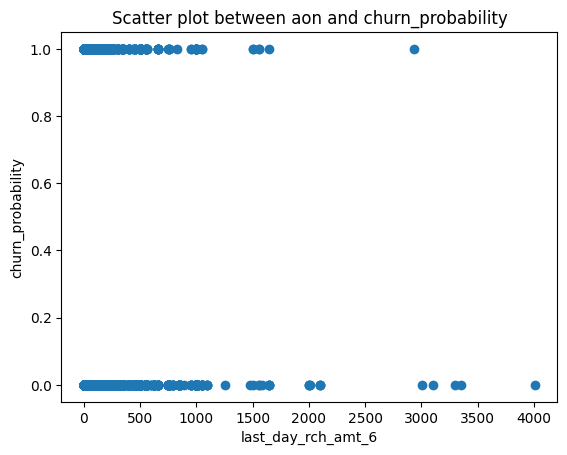

In [22]:
# plot between aon and churn_probability
from matplotlib import pyplot as plt
plt.scatter(df['last_day_rch_amt_6'], df['churn_probability'])
plt.xlabel('last_day_rch_amt_6')
plt.ylabel('churn_probability')
plt.title('Scatter plot between aon and churn_probability')
plt.show()

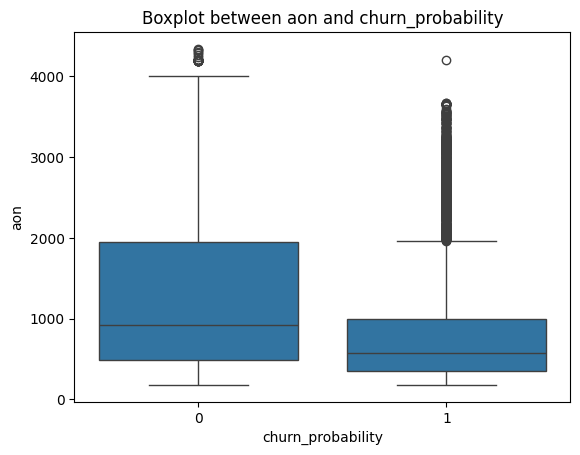

In [23]:
#plot boxplot between aon and churn_probability
import seaborn as sns
sns.boxplot(x='churn_probability', y='aon', data=df)
plt.title('Boxplot between aon and churn_probability')
plt.show()

In [24]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [25]:
empty_count = (df == "").sum().sum()
print(f"Number of empty cells: {empty_count}")


Number of empty cells: 0


In [26]:
df.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,334.213918,344.366927,351.924315,294.605405,305.867956,304.373330,311.131642,316.878225,316.270571,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,93.581000,86.714000,84.095000,8.060000,7.260000,7.360000,36.880000,33.980000,34.390000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,96.480000,91.885000,91.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,370.791000,365.369500,369.909000,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 129 entries, id to churn_probability
dtypes: float64(99), int64(27), object(3)
memory usage: 68.9+ MB


In [28]:
#print all the columns which are having object datatype in df
print(df.select_dtypes(include=['object']).columns)

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')


In [29]:
df[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/22/2014,7/10/2014,8/24/2014
1,6/12/2014,7/10/2014,8/26/2014
2,6/11/2014,7/22/2014,8/24/2014
3,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/26/2014,8/30/2014


In [30]:
import numpy as np

# Convert the date columns to datetime
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])

# Function to calculate the week of the month
def week_of_month(date):
    first_day = date.replace(day=1)
    dom = date.day
    adjusted_dom = dom + first_day.weekday()
    return int(np.ceil(adjusted_dom/7.0))

# Extract the week of the month from the date columns
df['week_of_last_rech_6'] = df['date_of_last_rech_6'].apply(week_of_month)
df['week_of_last_rech_7'] = df['date_of_last_rech_7'].apply(week_of_month)
df['week_of_last_rech_8'] = df['date_of_last_rech_8'].apply(week_of_month)

# Display the DataFrame with the extracted weeks
print(df[['week_of_last_rech_6', 'week_of_last_rech_7', 'week_of_last_rech_8']].head())

   week_of_last_rech_6  week_of_last_rech_7  week_of_last_rech_8
0                    4                    2                    4
1                    3                    2                    5
2                    3                    4                    4
3                    3                    4                    5
4                    5                    4                    5


In [31]:

# # Convert the date columns to datetime
# df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
# df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
# df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])

# # Extract the day from the date columns
# df['day_of_last_rech_6'] = df['date_of_last_rech_6'].dt.day
# df['day_of_last_rech_7'] = df['date_of_last_rech_7'].dt.day
# df['day_of_last_rech_8'] = df['date_of_last_rech_8'].dt.day

# # Display the DataFrame with the extracted days
# print(df[['day_of_last_rech_6', 'day_of_last_rech_7', 'day_of_last_rech_8']].head())

In [32]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,week_of_last_rech_6,week_of_last_rech_7,week_of_last_rech_8
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,1958,0.0,0.0,0.0,0,4,2,4
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,0,0,710,0.0,0.0,0.0,0,3,2,5
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,882,0.0,0.0,0.0,0,3,4,4
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,982,0.0,0.0,0.0,0,3,4,5
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,1,0,647,0.0,0.0,0.0,0,5,4,5


In [33]:
df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1, inplace=True)

In [34]:
df.head()


,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,week_of_last_rech_6,week_of_last_rech_7,week_of_last_rech_8
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,1958,0.0,0.0,0.0,0,4,2,4
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,0,0,710,0.0,0.0,0.0,0,3,2,5
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,882,0.0,0.0,0.0,0,3,4,4
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,982,0.0,0.0,0.0,0,3,4,5
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,1,0,647,0.0,0.0,0.0,0,5,4,5


In [35]:
# Move column 'churn_probability' to the last position
column_to_move = df.pop('churn_probability')
df['churn_probability'] = column_to_move

In [36]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,week_of_last_rech_6,week_of_last_rech_7,week_of_last_rech_8,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,1958,0.0,0.0,0.0,4,2,4,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,0,0,710,0.0,0.0,0.0,3,2,5,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,882,0.0,0.0,0.0,3,4,4,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,982,0.0,0.0,0.0,3,4,5,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,1,0,647,0.0,0.0,0.0,5,4,5,0


In [37]:
df.drop('id', axis=1, inplace=True)

In [38]:
#print all the columns which are having int datatype in df
print(df.select_dtypes(include=['int64']).columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'week_of_last_rech_6', 'week_of_last_rech_7', 'week_of_last_rech_8',
       'churn_probability'],
      dtype='object')


In [39]:
#print all the columns which are having float datatype in df
print(df.select_dtypes(include=['float64']).columns)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou

In [40]:
#applying scaling on float values

from sklearn.preprocessing import StandardScaler

# Select only the float columns for scaling
float_columns = df.select_dtypes(include=['float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the float columns
df[float_columns] = scaler.fit_transform(df[float_columns])

# Print confirmation
print("Scaling applied to float columns.")

Scaling applied to float columns.


In [41]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,week_of_last_rech_6,week_of_last_rech_7,week_of_last_rech_8,churn_probability
0,-0.753587,-0.555159,-0.771000,-0.273781,-0.018354,-0.415124,-0.522566,-0.304323,-0.596559,-0.166712,...,0,0,1958,-0.252885,-0.246124,-0.233557,4,2,4,0
1,-0.847171,-0.451263,-0.670336,-0.438681,-0.425003,-0.419362,-0.626189,-0.527407,-0.506255,-0.166712,...,0,0,710,-0.252885,-0.246124,-0.233557,3,2,5,0
2,-0.665232,-0.508211,-0.792389,-0.436882,-0.372921,-0.419362,-0.452660,-0.350492,-0.603926,-0.166712,...,0,0,882,-0.252885,-0.246124,-0.233557,3,4,4,0
3,-0.379318,-0.211770,-0.476708,-0.414037,-0.372660,-0.419362,-0.405187,-0.361758,-0.445105,-0.166712,...,0,0,982,-0.252885,-0.246124,-0.233557,3,4,5,0
4,-0.126945,-0.435570,-0.503788,-0.366448,-0.409212,-0.399222,-0.443017,-0.489158,-0.573477,0.786712,...,1,0,647,-0.252885,-0.246124,-0.233557,5,4,5,0


In [42]:
#applying scaling in int except churn_probability

from sklearn.preprocessing import StandardScaler

# Select integer columns excluding 'churn_probability'
int_columns = df.select_dtypes(include=['int64']).columns.drop('churn_probability')

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the integer columns
df[int_columns] = scaler.fit_transform(df[int_columns])

# Print confirmation
print("Scaling applied to integer columns except 'churn_probability'.")

Scaling applied to integer columns except 'churn_probability'.


In [43]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,week_of_last_rech_6,week_of_last_rech_7,week_of_last_rech_8,churn_probability
0,-0.753587,-0.555159,-0.771000,-0.273781,-0.018354,-0.415124,-0.522566,-0.304323,-0.596559,-0.166712,...,-0.128351,-0.12571,0.774197,-0.252885,-0.246124,-0.233557,-0.772919,-2.517515,-0.697767,0
1,-0.847171,-0.451263,-0.670336,-0.438681,-0.425003,-0.419362,-0.626189,-0.527407,-0.506255,-0.166712,...,-0.128351,-0.12571,-0.536150,-0.252885,-0.246124,-0.233557,-1.822211,-2.517515,0.521844,0
2,-0.665232,-0.508211,-0.792389,-0.436882,-0.372921,-0.419362,-0.452660,-0.350492,-0.603926,-0.166712,...,-0.128351,-0.12571,-0.355557,-0.252885,-0.246124,-0.233557,-1.822211,-0.285467,-0.697767,0
3,-0.379318,-0.211770,-0.476708,-0.414037,-0.372660,-0.419362,-0.405187,-0.361758,-0.445105,-0.166712,...,-0.128351,-0.12571,-0.250562,-0.252885,-0.246124,-0.233557,-1.822211,-0.285467,0.521844,0
4,-0.126945,-0.435570,-0.503788,-0.366448,-0.409212,-0.399222,-0.443017,-0.489158,-0.573477,0.786712,...,1.447588,-0.12571,-0.602297,-0.252885,-0.246124,-0.233557,0.276372,-0.285467,0.521844,0


In [44]:
# Apply one-hot encoding ["day_of_last_rech_6","day_of_last_rech_7","day_of_last_rech_8"]

In [45]:
# Check for missing values in the specified columns
missing_values = df[['week_of_last_rech_6', 'week_of_last_rech_7', 'week_of_last_rech_8']].isnull().sum()

# Display the result
print(missing_values)

week_of_last_rech_6    0
week_of_last_rech_7    0
week_of_last_rech_8    0
dtype: int64


In [46]:
# Apply one-hot encoding to the specified columns and convert to integer type
df= pd.get_dummies(df, columns=['week_of_last_rech_6', 'week_of_last_rech_7', 'week_of_last_rech_8'])

# Display the first few rows of the encoded DataFrame
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,week_of_last_rech_7_-3.6335391506306935,week_of_last_rech_7_-2.517515127124985,week_of_last_rech_7_-1.4014911036192772,week_of_last_rech_7_-0.28546708011356914,week_of_last_rech_7_0.8305569433921389,week_of_last_rech_8_-4.356602712716956,week_of_last_rech_8_-3.1369909096916038,week_of_last_rech_8_-1.9173791066662516,week_of_last_rech_8_-0.6977673036408996,week_of_last_rech_8_0.5218444993844525
0,-0.753587,-0.555159,-0.771000,-0.273781,-0.018354,-0.415124,-0.522566,-0.304323,-0.596559,-0.166712,...,False,True,False,False,False,False,False,False,True,False
1,-0.847171,-0.451263,-0.670336,-0.438681,-0.425003,-0.419362,-0.626189,-0.527407,-0.506255,-0.166712,...,False,True,False,False,False,False,False,False,False,True
2,-0.665232,-0.508211,-0.792389,-0.436882,-0.372921,-0.419362,-0.452660,-0.350492,-0.603926,-0.166712,...,False,False,False,True,False,False,False,False,True,False
3,-0.379318,-0.211770,-0.476708,-0.414037,-0.372660,-0.419362,-0.405187,-0.361758,-0.445105,-0.166712,...,False,False,False,True,False,False,False,False,False,True
4,-0.126945,-0.435570,-0.503788,-0.366448,-0.409212,-0.399222,-0.443017,-0.489158,-0.573477,0.786712,...,False,False,False,True,False,False,False,False,False,True


In [47]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,week_of_last_rech_7_-3.6335391506306935,week_of_last_rech_7_-2.517515127124985,week_of_last_rech_7_-1.4014911036192772,week_of_last_rech_7_-0.28546708011356914,week_of_last_rech_7_0.8305569433921389,week_of_last_rech_8_-4.356602712716956,week_of_last_rech_8_-3.1369909096916038,week_of_last_rech_8_-1.9173791066662516,week_of_last_rech_8_-0.6977673036408996,week_of_last_rech_8_0.5218444993844525
0,-0.753587,-0.555159,-0.771000,-0.273781,-0.018354,-0.415124,-0.522566,-0.304323,-0.596559,-0.166712,...,False,True,False,False,False,False,False,False,True,False
1,-0.847171,-0.451263,-0.670336,-0.438681,-0.425003,-0.419362,-0.626189,-0.527407,-0.506255,-0.166712,...,False,True,False,False,False,False,False,False,False,True
2,-0.665232,-0.508211,-0.792389,-0.436882,-0.372921,-0.419362,-0.452660,-0.350492,-0.603926,-0.166712,...,False,False,False,True,False,False,False,False,True,False
3,-0.379318,-0.211770,-0.476708,-0.414037,-0.372660,-0.419362,-0.405187,-0.361758,-0.445105,-0.166712,...,False,False,False,True,False,False,False,False,False,True
4,-0.126945,-0.435570,-0.503788,-0.366448,-0.409212,-0.399222,-0.443017,-0.489158,-0.573477,0.786712,...,False,False,False,True,False,False,False,False,False,True


In [48]:
# Convert all Boolean columns (True/False) to 1/0
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

C:\Users\Vinay Bora\AppData\Local\Temp\ipykernel_700\2886211266.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [49]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,week_of_last_rech_7_-3.6335391506306935,week_of_last_rech_7_-2.517515127124985,week_of_last_rech_7_-1.4014911036192772,week_of_last_rech_7_-0.28546708011356914,week_of_last_rech_7_0.8305569433921389,week_of_last_rech_8_-4.356602712716956,week_of_last_rech_8_-3.1369909096916038,week_of_last_rech_8_-1.9173791066662516,week_of_last_rech_8_-0.6977673036408996,week_of_last_rech_8_0.5218444993844525
0,-0.753587,-0.555159,-0.771000,-0.273781,-0.018354,-0.415124,-0.522566,-0.304323,-0.596559,-0.166712,...,0,1,0,0,0,0,0,0,1,0
1,-0.847171,-0.451263,-0.670336,-0.438681,-0.425003,-0.419362,-0.626189,-0.527407,-0.506255,-0.166712,...,0,1,0,0,0,0,0,0,0,1
2,-0.665232,-0.508211,-0.792389,-0.436882,-0.372921,-0.419362,-0.452660,-0.350492,-0.603926,-0.166712,...,0,0,0,1,0,0,0,0,1,0
3,-0.379318,-0.211770,-0.476708,-0.414037,-0.372660,-0.419362,-0.405187,-0.361758,-0.445105,-0.166712,...,0,0,0,1,0,0,0,0,0,1
4,-0.126945,-0.435570,-0.503788,-0.366448,-0.409212,-0.399222,-0.443017,-0.489158,-0.573477,0.786712,...,0,0,0,1,0,0,0,0,0,1


In [50]:
# Move column 'churn_probability' to the last position
column_to_move = df.pop('churn_probability')
df['churn_probability'] = column_to_move
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,week_of_last_rech_7_-2.517515127124985,week_of_last_rech_7_-1.4014911036192772,week_of_last_rech_7_-0.28546708011356914,week_of_last_rech_7_0.8305569433921389,week_of_last_rech_8_-4.356602712716956,week_of_last_rech_8_-3.1369909096916038,week_of_last_rech_8_-1.9173791066662516,week_of_last_rech_8_-0.6977673036408996,week_of_last_rech_8_0.5218444993844525,churn_probability
0,-0.753587,-0.555159,-0.771000,-0.273781,-0.018354,-0.415124,-0.522566,-0.304323,-0.596559,-0.166712,...,1,0,0,0,0,0,0,1,0,0
1,-0.847171,-0.451263,-0.670336,-0.438681,-0.425003,-0.419362,-0.626189,-0.527407,-0.506255,-0.166712,...,1,0,0,0,0,0,0,0,1,0
2,-0.665232,-0.508211,-0.792389,-0.436882,-0.372921,-0.419362,-0.452660,-0.350492,-0.603926,-0.166712,...,0,0,1,0,0,0,0,1,0,0
3,-0.379318,-0.211770,-0.476708,-0.414037,-0.372660,-0.419362,-0.405187,-0.361758,-0.445105,-0.166712,...,0,0,1,0,0,0,0,0,1,0
4,-0.126945,-0.435570,-0.503788,-0.366448,-0.409212,-0.399222,-0.443017,-0.489158,-0.573477,0.786712,...,0,0,1,0,0,0,0,0,1,0


In [51]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df.corr().abs()

# Select the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find features with correlation greater than 0.9
high_correlation_features = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)
]

# Drop highly correlated features
df = df.drop(columns=high_correlation_features)

# Print the remaining features
print("Remaining features after removing highly correlated ones:")
print(df.columns)

Remaining features after removing highly correlated ones:
Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'week_of_last_rech_7_-2.517515127124985',
       'week_of_last_rech_7_-1.4014911036192772',
       'week_of_last_rech_7_-0.28546708011356914',
       'week_of_last_rech_7_0.8305569433921389',
       'week_of_last_rech_8_-4.356602712716956',
       'week_of_last_rech_8_-3.1369909096916038',
       'week_of_last_rech_8_-1.9173791066662516',
       'week_of_last_rech_8_-0.6977673036408996',
       'week_of_last_rech_8_0.5218444993844525', 'churn_probability'],
      dtype='object', length=135)


In [52]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,week_of_last_rech_7_-2.517515127124985,week_of_last_rech_7_-1.4014911036192772,week_of_last_rech_7_-0.28546708011356914,week_of_last_rech_7_0.8305569433921389,week_of_last_rech_8_-4.356602712716956,week_of_last_rech_8_-3.1369909096916038,week_of_last_rech_8_-1.9173791066662516,week_of_last_rech_8_-0.6977673036408996,week_of_last_rech_8_0.5218444993844525,churn_probability
0,-0.753587,-0.555159,-0.771000,-0.273781,-0.018354,-0.415124,-0.522566,-0.304323,-0.596559,-0.166712,...,1,0,0,0,0,0,0,1,0,0
1,-0.847171,-0.451263,-0.670336,-0.438681,-0.425003,-0.419362,-0.626189,-0.527407,-0.506255,-0.166712,...,1,0,0,0,0,0,0,0,1,0
2,-0.665232,-0.508211,-0.792389,-0.436882,-0.372921,-0.419362,-0.452660,-0.350492,-0.603926,-0.166712,...,0,0,1,0,0,0,0,1,0,0
3,-0.379318,-0.211770,-0.476708,-0.414037,-0.372660,-0.419362,-0.405187,-0.361758,-0.445105,-0.166712,...,0,0,1,0,0,0,0,0,1,0
4,-0.126945,-0.435570,-0.503788,-0.366448,-0.409212,-0.399222,-0.443017,-0.489158,-0.573477,0.786712,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Step 1: Define features (X) and target (y)
X = df.drop(columns=['churn_probability'])  # All columns except the target
y = df['churn_probability']  # The target column

# 2. Apply PCA
pca = PCA(n_components=3)  # Retain all components initially
X_pca = pca.fit_transform(X)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

# 3. Decide the number of components (e.g., retain components explaining 95% variance)
n_components = sum(cumulative_variance <= 0.95) + 1
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X)
print(f"Selected {n_components} components.")

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

# 5. Logistic Regression on PCA-transformed data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 6. Make predictions and evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with PCA: {accuracy:.2f}")
print("Done!")


Explained Variance Ratio: [0.12206366 0.07630573 0.05141585]
Cumulative Variance: [0.12206366 0.1983694  0.24978525]
Selected 4 components.
Accuracy with PCA: 0.90
Done!


In [62]:
# Convert X_pca to a DataFrame for better readability
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the churn_probability column to the DataFrame
X_pca_df['churn_probability'] = y.values

# Display the first few rows
X_pca_df.head()

,PC1,PC2,PC3,churn_probability
0,-3.245338,0.831616,-0.452602,0
1,-3.323782,0.581293,0.433643,0
2,-3.339203,0.309785,-0.419988,0
3,-2.530628,0.084648,-0.139346,0
4,-2.814894,0.618578,0.866925,0


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 1: Define features (X) and target (y)
X = df.drop(columns=['churn_probability'])  # All columns except the target
y = df['churn_probability']  # The target column

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9321428571428572
Confusion Matrix:
[[12395   183]
 [  767   655]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12578
           1       0.78      0.46      0.58      1422

    accuracy                           0.93     14000
   macro avg       0.86      0.72      0.77     14000
weighted avg       0.93      0.93      0.92     14000



In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Load your dataset
# Replace 'your_dataset.csv' and 'target' with your actual file and target column
# Step 1: Define features (X) and target (y)
X = df.drop(columns=['churn_probability'])  # All columns except the target
y = df['churn_probability']  # The target column

# Step 2: Inspect class distribution
print("Class distribution before undersampling:")
print(y.value_counts())

# Step 3: Undersample the majority class
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Verify class distribution after undersampling
print("Class distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Step 5: Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))


Class distribution before undersampling:
churn_probability
0    62867
1     7132
Name: count, dtype: int64
Class distribution after undersampling:
churn_probability
0    7132
1    7132
Name: count, dtype: int64

Confusion Matrix:
[[1207  237]
 [ 218 1191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1444
           1       0.83      0.85      0.84      1409

    accuracy                           0.84      2853
   macro avg       0.84      0.84      0.84      2853
weighted avg       0.84      0.84      0.84      2853


ROC-AUC Score:
0.9100833777319919


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Step 1: Load your dataset
# Replace 'your_dataset.csv' and 'target' with your actual file and target column
# Step 1: Define features (X) and target (y)
X = df.drop(columns=['churn_probability'])  # All columns except the target
y = df['churn_probability']  # The target column

# Step 2: Inspect class distribution
print("Class distribution before oversampling:")
print(y.value_counts())

# Step 3: Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify class distribution after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Step 5: Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))


Class distribution before oversampling:
churn_probability
0    62867
1     7132
Name: count, dtype: int64
Class distribution after oversampling:
churn_probability
0    62867
1    62867
Name: count, dtype: int64

Confusion Matrix:
[[12061   659]
 [ 1189 11238]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     12720
           1       0.94      0.90      0.92     12427

    accuracy                           0.93     25147
   macro avg       0.93      0.93      0.93     25147
weighted avg       0.93      0.93      0.93     25147


ROC-AUC Score:
0.975220103011651
